In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("train.csv")

In [3]:
train = data.copy()

In [4]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
train["total_spending"] = train["RoomService"] + train["FoodCourt"] + train["ShoppingMall"] + train["Spa"] + train["VRDeck"]

In [6]:
train = train.drop(["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"], axis=1)

In [7]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Name,Transported,total_spending
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,Maham Ofracculy,False,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,Juanna Vines,True,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,Altark Susent,False,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,Solam Susent,False,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,Willy Santantines,True,1091.0
...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,Gravior Noxnuther,False,8536.0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,Kurta Mondalley,False,0.0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,Fayey Connon,True,1873.0
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,Celeon Hontichre,False,4637.0


In [8]:
train["Transported"] = np.where(train["Transported"] == False, 0, 1)

In [9]:
train["VIP"] = np.where(train["VIP"] == False, 0, 1)

In [10]:
train["CryoSleep"] = np.where(train["CryoSleep"] == False, 0, 1)

In [11]:
homeplanet_mapping = {"Europa": 1, "Earth": 2, "Mars": 3}
train["HomePlanet"] = train["HomePlanet"].map(homeplanet_mapping)

In [12]:
destination_mapping = {"TRAPPIST-1e": 1, "PSO J318.5-22": 2, "55 Cancri e": 3}
train["Destination"] = train["Destination"].map(destination_mapping)

In [13]:
train["Deck"] = train["Cabin"].str.split("/").str[0]
train["CabinNumber"] = train["Cabin"].str.split("/").str[1]
train["Side"] = train["Cabin"].str.split("/").str[2]

In [14]:
train = train.drop(["Cabin", "Name"], axis="columns")

In [15]:
train["Deck"].unique()

array(['B', 'F', 'A', 'G', nan, 'E', 'D', 'C', 'T'], dtype=object)

In [16]:
train["Side"].unique()

array(['P', 'S', nan], dtype=object)

In [17]:
train["Side"] = np.where(train["Side"] == 'P', 0, 1)

In [18]:
deck_mapping = {
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
    'E': 5,
    'F': 6,
    'G': 7,
    'T': 8}

train["Deck"] = train["Deck"].map(deck_mapping)

In [19]:
train[["Group", "PassengerNumber"]] = train["PassengerId"].str.split("_", expand=True)

In [20]:
train

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,total_spending,Deck,CabinNumber,Side,Group,PassengerNumber
0,0001_01,1.0,0,1.0,39.0,0,0,0.0,2.0,0,0,0001,01
1,0002_01,2.0,0,1.0,24.0,0,1,736.0,6.0,0,1,0002,01
2,0003_01,1.0,0,1.0,58.0,1,0,10383.0,1.0,0,1,0003,01
3,0003_02,1.0,0,1.0,33.0,0,0,5176.0,1.0,0,1,0003,02
4,0004_01,2.0,0,1.0,16.0,0,1,1091.0,6.0,1,1,0004,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1.0,0,3.0,41.0,1,0,8536.0,1.0,98,0,9276,01
8689,9278_01,2.0,1,2.0,18.0,0,0,0.0,7.0,1499,1,9278,01
8690,9279_01,2.0,0,1.0,26.0,0,1,1873.0,7.0,1500,1,9279,01
8691,9280_01,1.0,0,3.0,32.0,0,0,4637.0,5.0,608,1,9280,01


In [21]:
train = train.drop("PassengerId", axis="columns")

In [22]:
train

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,total_spending,Deck,CabinNumber,Side,Group,PassengerNumber
0,1.0,0,1.0,39.0,0,0,0.0,2.0,0,0,0001,01
1,2.0,0,1.0,24.0,0,1,736.0,6.0,0,1,0002,01
2,1.0,0,1.0,58.0,1,0,10383.0,1.0,0,1,0003,01
3,1.0,0,1.0,33.0,0,0,5176.0,1.0,0,1,0003,02
4,2.0,0,1.0,16.0,0,1,1091.0,6.0,1,1,0004,01
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1.0,0,3.0,41.0,1,0,8536.0,1.0,98,0,9276,01
8689,2.0,1,2.0,18.0,0,0,0.0,7.0,1499,1,9278,01
8690,2.0,0,1.0,26.0,0,1,1873.0,7.0,1500,1,9279,01
8691,1.0,0,3.0,32.0,0,0,4637.0,5.0,608,1,9280,01


In [23]:
train["Group"].isna().sum()

0

In [24]:
train["PassengerNumber"].isna().sum()

0

In [25]:
train["Age"].isna().sum()

179

In [26]:
train["HomePlanet"].isna().sum()

201

In [27]:
train["Destination"].isna().sum()

182

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   HomePlanet       8492 non-null   float64
 1   CryoSleep        8693 non-null   int32  
 2   Destination      8511 non-null   float64
 3   Age              8514 non-null   float64
 4   VIP              8693 non-null   int32  
 5   Transported      8693 non-null   int32  
 6   total_spending   7785 non-null   float64
 7   Deck             8494 non-null   float64
 8   CabinNumber      8494 non-null   object 
 9   Side             8693 non-null   int32  
 10  Group            8693 non-null   object 
 11  PassengerNumber  8693 non-null   object 
dtypes: float64(5), int32(4), object(3)
memory usage: 679.3+ KB


In [29]:
train["CabinNumber"].isna().sum()

199

In [32]:
train["CabinNumber"] = train["CabinNumber"].isna().sum()

In [33]:
train["CabinNumber"].isna().sum()

0

In [34]:
train.isna().sum()

HomePlanet         201
CryoSleep            0
Destination        182
Age                179
VIP                  0
Transported          0
total_spending     908
Deck               199
CabinNumber          0
Side                 0
Group                0
PassengerNumber      0
dtype: int64

In [35]:
train["HomePlanet"] = train["HomePlanet"].fillna(train["HomePlanet"].mean())

In [36]:
train["Destination"] = train["Destination"].fillna(train["Destination"].mean())

In [39]:
train["Age"] = train["Age"].fillna(train["Age"].mean())

In [40]:
max(train["total_spending"])

35987.0

In [41]:
min(train["total_spending"])

0.0

In [42]:
train["total_spending"].mean()

1484.6015414258188

In [43]:
train["total_spending"].median()

736.0

<Axes: >

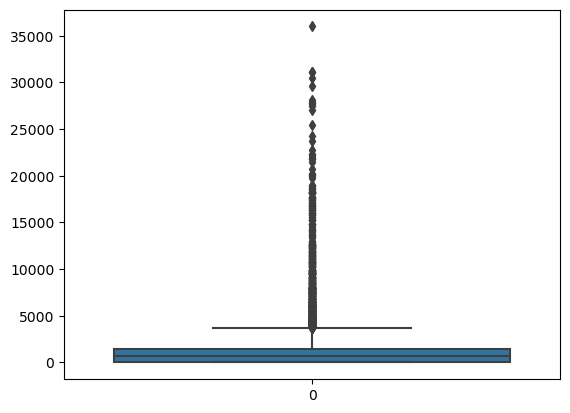

In [46]:
import seaborn as sns
sns.boxplot(train["total_spending"])

In [47]:
train["total_spending"] = train["total_spending"].fillna(train["total_spending"].mean())

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   HomePlanet       8693 non-null   float64
 1   CryoSleep        8693 non-null   int32  
 2   Destination      8693 non-null   float64
 3   Age              8693 non-null   float64
 4   VIP              8693 non-null   int32  
 5   Transported      8693 non-null   int32  
 6   total_spending   8693 non-null   float64
 7   Deck             8494 non-null   float64
 8   CabinNumber      8693 non-null   int64  
 9   Side             8693 non-null   int32  
 10  Group            8693 non-null   object 
 11  PassengerNumber  8693 non-null   object 
dtypes: float64(5), int32(4), int64(1), object(2)
memory usage: 679.3+ KB


In [59]:
train["Deck"] = train["Deck"].fillna(train["Deck"].median())

In [62]:
train.isna().sum()

HomePlanet         0
CryoSleep          0
Destination        0
Age                0
VIP                0
Transported        0
total_spending     0
Deck               0
CabinNumber        0
Side               0
Group              0
PassengerNumber    0
dtype: int64

In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   HomePlanet       8693 non-null   float64
 1   CryoSleep        8693 non-null   int32  
 2   Destination      8693 non-null   float64
 3   Age              8693 non-null   float64
 4   VIP              8693 non-null   int32  
 5   Transported      8693 non-null   int32  
 6   total_spending   8693 non-null   float64
 7   Deck             8693 non-null   float64
 8   CabinNumber      8693 non-null   int64  
 9   Side             8693 non-null   int32  
 10  Group            8693 non-null   object 
 11  PassengerNumber  8693 non-null   object 
dtypes: float64(5), int32(4), int64(1), object(2)
memory usage: 679.3+ KB


In [65]:
train["Group"] = train["Group"].astype("int")
train["PassengerNumber"] = train["PassengerNumber"].astype("int")

In [70]:
round(train.corr(), 2)

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,total_spending,Deck,CabinNumber,Side,Group,PassengerNumber
HomePlanet,1.00,-0.04,-0.25,-0.13,-0.04,-0.10,-0.30,0.57,NaN,-0.04,-0.01,-0.07
CryoSleep,-0.04,1.00,0.09,-0.07,-0.05,0.45,-0.35,0.02,NaN,0.02,-0.00,0.06
Destination,-0.25,0.09,1.00,0.01,0.03,0.11,0.09,-0.18,NaN,0.01,0.00,0.03
Age,-0.13,-0.07,0.01,1.00,0.06,-0.07,0.18,-0.24,NaN,0.01,-0.01,-0.13
VIP,-0.04,-0.05,0.03,0.06,1.00,-0.02,0.11,-0.12,NaN,-0.00,0.02,-0.00
Transported,-0.10,0.45,0.11,-0.07,-0.02,1.00,-0.19,-0.11,NaN,0.10,0.02,0.07
total_spending,-0.30,-0.35,0.09,0.18,0.11,-0.19,1.00,-0.37,NaN,0.00,-0.00,0.01
Deck,0.57,0.02,-0.18,-0.24,-0.12,-0.11,-0.37,1.00,NaN,-0.03,-0.00,-0.08
CabinNumber,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Side,-0.04,0.02,0.01,0.01,-0.00,0.10,0.00,-0.03,NaN,1.00,-0.01,0.01


In [69]:
train

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,total_spending,Deck,CabinNumber,Side,Group,PassengerNumber
0,1.0,0,1.0,39.0,0,0,0.0,2.0,199,0,1,1
1,2.0,0,1.0,24.0,0,1,736.0,6.0,199,1,2,1
2,1.0,0,1.0,58.0,1,0,10383.0,1.0,199,1,3,1
3,1.0,0,1.0,33.0,0,0,5176.0,1.0,199,1,3,2
4,2.0,0,1.0,16.0,0,1,1091.0,6.0,199,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1.0,0,3.0,41.0,1,0,8536.0,1.0,199,0,9276,1
8689,2.0,1,2.0,18.0,0,0,0.0,7.0,199,1,9278,1
8690,2.0,0,1.0,26.0,0,1,1873.0,7.0,199,1,9279,1
8691,1.0,0,3.0,32.0,0,0,4637.0,5.0,199,1,9280,1
